**Dimension Reduction**

High dimensionality in data science refers to when there are a large number of predictors in the data set. For example, 100 predictors describe a 100‐dimensional space. So, why do we need dimension reduction in data science?

Multicollinearity. Typically, large databases have many predictors. It is unlikely that all of these predictors are uncorrelated. Multicollinearity, which occurs when there is substantial correlation among the predictors, can lead to unstable regression models.

Double‐Counting. Inclusion of predictors which are highly correlated tends to overemphasize a particular aspect of the model, that is, essentially double‐counting this aspect. For example, suppose we are trying to estimate the age of youngsters using math knowledge, height, and weight. Since height and weight are correlated, the model is essentially double‐counting the physical component of the youngster, as compared to the intellectual component.

Curse of Dimensionality. As dimensionality increases, the volume of the predictor space grows exponentially, that is, faster than the number of predictors itself. Thus, even for huge sample sizes, the high‐dimension space is sparse. For example, the empirical rule states that about 68% of normally distributed data lies within one standard deviation of the mean. But, this is for one dimension. For 10 dimensions, only 2% of the data lies within the analogous hypersphere.

Violates Parsimony. The use of too many predictors also violates the principle of parsimony, the scientific principle one sees in many branches of science, that things often behave in a quite economical way. In data science, simplicity (parsimony) should be considered when comparing models, keeping the number of predictors to such a size that would be easily interpreted.

Overfitting. Keeping too many predictors in the model tends to lead to overfitting, in which the generality of the findings is hindered because new data do not behave the same as the training data for all the many predictors.

Miss the Bigger Picture. Further, analysts should try to keep an eye on the big picture, and analysis solely at the variable level might miss the fundamentals underlying relationships among the predictors. Instead, several predictors might fall naturally into a single group (a factor or component), which addresses a single aspect of the data. For example, the variables savings account balance, checking account balance, home equity, stock portfolio value, and 401 k balance might all fall together under the single component, assets.

In summary, dimension reduction methods use the correlation structure among the predictor variables to accomplish the following:

* Reduce the number of predictor items.
* Help ensure that these predictors items are uncorrelated.
* Provide a framework for interpretability of the results.

**MULTICOLLINEARITY**

Data scientists need to guard against multicollinearity, a condition where some of the predictor variables are correlated with each other. Multicollinearity leads to instability in the solution space, leading, for example, to regression coefficients you cannot trust, because the coefficient variability is so large. Multicollinearity is an occupational hazard for data scientists, because many of the data sets have dozens if not hundreds of predictors, some of which are often correlated.

**IDENTIFYING MULTICOLLINEARITY USING VARIANCE INFLATION FACTORS**

However, suppose we did not check for the presence of correlation among our predictors, and went ahead and performed the regression anyway. Is there some way that the regression results can warn us of the presence of multicollinearity? The answer is yes: We may ask for the variance inflation factors (VIFs) to be reported.

The VIF for the ith predictor is given by:

VIFi = 1/(1-R2i)
where R2i represents the R2 value obtained by regressing xi on the other predictor variables. Note that R2i will be large when xi is highly correlated with the other predictors, thus making VIFi large.

A rough rule of thumb for interpreting the value of the VIF is to consider VIFi ≥ 5 to be an indicator of moderate multicollinearity, and to consider VIFi ≥ 10 to be an indicator of severe multicollinearity. A VIF of five corresponds to R2i = 0.80, while VIFi = 10 corresponds to R2i = 0.80.

In [ ]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.stats.outliers_influence as inf

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
url = 'https://raw.githubusercontent.com/ArashVafa/DESC624/master/cereals.CSV'
#The data already has an index column at index = 0
df = pd.read_csv(url)

#show a few example rows from the dataset
df.head()

,Name,Manuf,Type,Calories,Protein,Fat,Sodium,Fiber,Carbo,Sugars,Potass,Vitamins,Shelf,Weight,Cups,Rating,Cold,Nabisco,Quaker,Kelloggs,GeneralMills,Ralston,AHFP
0,100%_Bran,N,C,70,4,1,130,10.0,5.0,6.0,280.0,25,3,1.0,0.33,68.402973,1,1,0,0,0,0,0
1,100%_Natural_Bran,Q,C,120,3,5,15,2.0,8.0,8.0,135.0,0,3,1.0,1.00,33.983679,1,0,1,0,0,0,0
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5.0,320.0,25,3,1.0,0.33,59.425505,1,0,0,1,0,0,0
3,All-Bran_with_Extra_Fiber,K,C,50,4,0,140,14.0,8.0,0.0,330.0,25,3,1.0,0.50,93.704912,1,0,0,1,0,0,0
4,Almond_Delight,R,C,110,2,2,200,1.0,14.0,8.0,NaN,25,3,1.0,0.75,34.384843,1,0,0,0,0,1,0


In [ ]:
X = pd.DataFrame(df[['Sugars', 'Fiber', 'Potass']])

In [ ]:
X = X.dropna()

In [ ]:
X = sm.add_constant(X)

In [ ]:
[inf.variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

[5.7490936686975544, 1.158760830266874, 6.8500495939437975, 6.693981514266847]

The output will include a VIF value for the constant term we added; ignore it. The VIF values of interest are for the three predictor variables, which are the second, third, and fourth numbers output by the variance_inflation_factor() command.

**PRINCIPAL COMPONENTS ANALYSIS**

So, now that we have identified the multicollinearity among our predictors, what do we do now?

One solution is to apply principal components analysis. Principal components analysis (PCA) seeks to account for the correlation structure of a set of predictor variables, using a smaller set of uncorrelated linear combinations of these variables, called components. The total variability produced by the complete set of m predictors can often be mostly accounted for by a smaller set of k < m components. This means that there is almost as much information in the k components as there is in the original m variables. In addition, the k components are uncorrelated with each other, unlike the original correlated predictors. If desired, the analyst can then replace the original m variables with the k < m components, so that the working data set now consists of n records on k components, rather than n records on m predictors. This is dimension reduction!

The analyst should note that PCA acts solely on the predictor variables and ignores the target variable. Also, the predictors should be either standardized or normalized. Mathematically, the principal components are uncorrelated linear combinations Yi of predictors, with the following characteristics:

The first principal component is usually the most important. It accounts for greater variability among the predictors than any other component.
The second principal component accounts for the second‐most variability and is uncorrelated with the first.
The third principal component accounts for the third‐most variability and is uncorrelated with the first two, and so on.

In [ ]:
import pandas as pd
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
# load dataset into Pandas DataFrame
df = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])

**Standardize the Data**

PCA is effected by scale so you need to scale the features in your data before applying PCA. Use StandardScaler to help you standardize the dataset’s features onto unit scale (mean = 0 and variance = 1) which is a requirement for the optimal performance of many machine learning algorithms. If you want to see the negative effect not scaling your data can have, scikit-learn has a section on the effects of not standardizing your data.

In [ ]:
from sklearn.preprocessing import StandardScaler
features = ['sepal length', 'sepal width', 'petal length', 'petal width']
# Separating out the features
x = df.loc[:, features].values
# Separating out the target
y = df.loc[:,['target']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)

**PCA Projection to 2D**

The original data has 4 columns (sepal length, sepal width, petal length, and petal width). In this section, the code projects the original data which is 4 dimensional into 2 dimensions. I should note that after dimensionality reduction, there usually isn’t a particular meaning assigned to each principal component. The new components are just the two main dimensions of variation.

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2', 'principal component 3'])


In [ ]:
finalDf = pd.concat([principalDf, df[['target']]], axis = 1)

In [ ]:
finalDf.head()

,principal component 1,principal component 2,principal component 3,target
0,-2.264542,0.505704,-0.121943,Iris-setosa
1,-2.086426,-0.655405,-0.227251,Iris-setosa
2,-2.367950,-0.318477,0.051480,Iris-setosa
3,-2.304197,-0.575368,0.098860,Iris-setosa
4,-2.388777,0.674767,0.021428,Iris-setosa


**Explained Variance**

The explained variance tells you how much information (variance) can be attributed to each of the principal components. This is important as while you can convert 4 dimensional space to 2 dimensional space, you lose some of the variance (information) when you do this. By using the attribute explained_variance_ratio_, you can see that the first principal component contains 72.77% of the variance and the second principal component contains 23.03% of the variance. Together, the two components contain 95.80% of the information.

In [ ]:
pca.explained_variance_ratio_

array([0.72770452, 0.23030523, 0.03683832])

**HOW MANY COMPONENTS SHOULD WE EXTRACT?**

Recall that one of the motivations for PCA was to reduce the dimensionality. The question arises, “How do we determine how many components to extract?” For example, should we retain only the first principal components, since it explain over half (72% Cumulative Var) of the total variability? Or should we retain all 3 components, since they explain 100% of the variability? Well, clearly, retaining all 3 components does not help us to reduce the dimensionality. As usual, the answer lies somewhere between these two extremes.

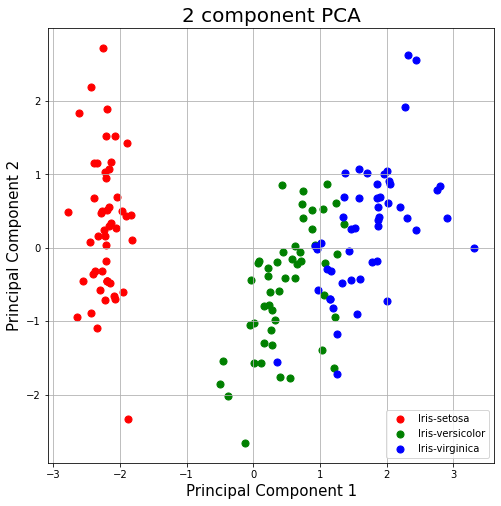

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [ ]:
from sklearn.preprocessing import StandardScaler

# standardize the features
sc = StandardScaler()
x_std = sc.fit_transform(x)
x_std = sc.transform(x)

In [ ]:
import numpy as np

cov_mat = np.cov(x_std.T)
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)

In [ ]:
eigen_vals

array([2.93035378, 0.92740362, 0.14834223, 0.02074601])

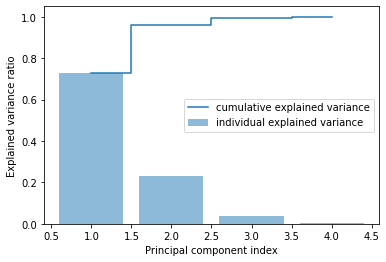

In [ ]:
import matplotlib.pyplot as plt

# calculate cumulative sum of explained variances
tot = sum(eigen_vals)
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

# plot explained variances
plt.bar(range(1,eigen_vals.size+1), var_exp, alpha=0.5,
        align='center', label='individual explained variance')
plt.step(range(1,eigen_vals.size+1), cum_var_exp, where='mid',
         label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.show()

**Wine Dataset Example**

In [ ]:
import pandas as pd

df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/'
                      'machine-learning-databases/wine/wine.data',
                      header=None)
df_wine.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# split into training and testing sets
X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3,
    stratify=y, random_state=0
)
# standardize the features
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [ ]:
import numpy as np

cov_mat = np.cov(X_train_std.T)
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)

Since we want to reduce the dimensionality of our dataset by compressing it onto a new feature subspace, we only select the subset of the eigenvectors (principal components) that contains most of the information (variance). The eigenvalues define the magnitude of the eigenvectors, so we have to sort the eigenvalues by decreasing magnitude; we are interested in the top k eigenvectors based on the values of their corresponding eigenvalues.



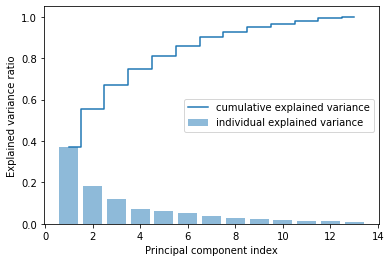

In [ ]:
import matplotlib.pyplot as plt

# calculate cumulative sum of explained variances
tot = sum(eigen_vals)
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

# plot explained variances
plt.bar(range(1,14), var_exp, alpha=0.5,
        align='center', label='individual explained variance')
plt.step(range(1,14), cum_var_exp, where='mid',
         label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.show()

The resulting plot indicates that the first principal component alone accounts for approximately 40% of the variance. Also, we can see that the first two principal components combined explain almost 60% of the variance in the dataset.

After we have successfully decomposed the covariance matrix into eigenpairs, let’s now proceed with the last three steps of PCA to transform the Wine dataset onto the new principal component axes.

We will sort the eigenpairs by descending order of the eigenvalues, construct a projection matrix from the selected eigenvectors, and use the projection matrix to transform the data onto the lower-dimensional subspace.
We start by sorting the eigenpairs by decreasing order of the eigenvalues:

In [ ]:
# Make a list of (eigenvalue, eigenvector) tuples
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i]) for i in range(len(eigen_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eigen_pairs.sort(key=lambda k: k[0], reverse=True)

Next, we collect the two eigenvectors that correspond to the two largest eigenvalues, to capture about 60% of the variance in this dataset. Note that we only chose two eigenvectors for the purpose of illustration, since we are going to plot the data via a two-dimensional scatter plot later in this subsection. In practice, the number of principal components has to be determined by a trade-off between computational efficiency and the performance of the classifier:

In [ ]:
w = np.hstack((eigen_pairs[0][1][:, np.newaxis], eigen_pairs[1][1][:, np.newaxis]))
print('Matrix W:\n', w)

Matrix W:
 [[-0.13724218  0.50303478]
 [ 0.24724326  0.16487119]
 [-0.02545159  0.24456476]
 [ 0.20694508 -0.11352904]
 [-0.15436582  0.28974518]
 [-0.39376952  0.05080104]
 [-0.41735106 -0.02287338]
 [ 0.30572896  0.09048885]
 [-0.30668347  0.00835233]
 [ 0.07554066  0.54977581]
 [-0.32613263 -0.20716433]
 [-0.36861022 -0.24902536]
 [-0.29669651  0.38022942]]


By executing the preceding code, we have created a 13 x 2-dimensional projection matrix W from the top two eigenvectors.

Using the projection matrix, we can now transform a sample x (represented as a 1 x 13-dimensional row vector) onto the PCA subspace (the principal components one and two) obtaining x′, now a two-dimensional sample vector consisting of two new features:

In [ ]:
X_train_std[0].dot(w)

array([2.38299011, 0.45458499])

In [ ]:
X_train_pca = X_train_std.dot(w)

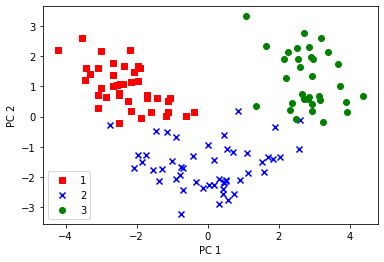

In [ ]:
colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']
for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_pca[y_train==l, 0], 
                X_train_pca[y_train==l, 1], 
                c=c, label=l, marker=m) 
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.show()

As we can see in the resulting plot, the data is more spread along the x-axis — the first principal component — than the second principal component (y-axis), which is consistent with the explained variance ratio plot that we created previously. However, we can intuitively see that a linear classifier will likely be able to separate the classes well.

Although we encoded the class label information for the purpose of illustration in the preceding scatter plot, we have to keep in mind that PCA is an unsupervised technique that does not use any class label information.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA

# intialize pca and logistic regression model
pca = PCA(n_components=2)
lr = LogisticRegression(multi_class='auto', solver='liblinear')

# fit and transform data
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)
lr.fit(X_train_pca, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

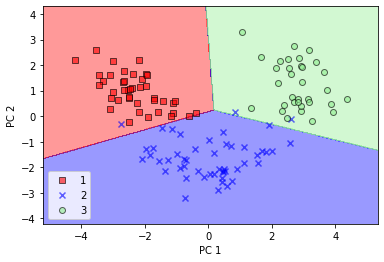

In [ ]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.6, 
                    c=[cmap(idx)],
                    edgecolor='black',
                    marker=markers[idx], 
                    label=cl)# plot decision regions for training set


plot_decision_regions(X_train_pca, y_train, classifier=lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.show()

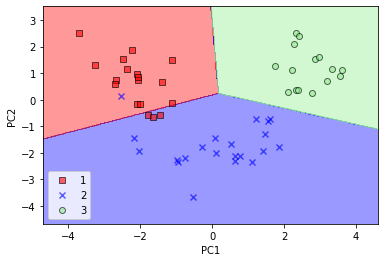

In [ ]:
# plot decision regions for test set
plot_decision_regions(X_test_pca, y_test, classifier=lr)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(loc='lower left')
plt.show()

In [ ]:
pca = PCA(n_components=None)
X_train_pca = pca.fit_transform(X_train_std)
pca.explained_variance_ratio_

array([0.36951469, 0.18434927, 0.11815159, 0.07334252, 0.06422108,
       0.05051724, 0.03954654, 0.02643918, 0.02389319, 0.01629614,
       0.01380021, 0.01172226, 0.00820609])